In [69]:
## This is an old script. Use the updated one above.

import dill
import salty
from rdkit import Chem
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.rdmolfiles import MolToPDBFile

property_model = "cpt_density" #load data for which we have cpt and density exp values
pickle_in = open("/Users/prguser/Desktop/salty/salty/data/MODELS/%s_devmodel.pkl" % property_model, "rb")
devmodel = dill.load(pickle_in)

salts = (devmodel.Data["smiles-cation"]+"."+devmodel.Data["smiles-anion"]).unique() #grab the unique salts
print(len(salts))
   
for i in range(len(salts[:1])):
    cation = Chem.MolFromSmiles(salts[0].split(".")[0])
    anion = Chem.MolFromSmiles(salts[0].split(".")[1]) #grab cation/anion
    cation = Chem.AddHs(cation) #add Hs
    Chem.EmbedMolecule(cation, Chem.ETKDG()) #Geo optimization for coordinates
    Chem.UFFOptimizeMolecule(cation) #FF optimization for better coordinates
    anion = Chem.AddHs(anion)
    Chem.EmbedMolecule(anion, Chem.ETKDG())
    Chem.UFFOptimizeMolecule(anion)
    
    if i < 10:
        MolToPDBFile(cation,"C0{}.pdb".format(i)) #write pdb files somewhere
        MolToPDBFile(anion,"A0{}.pdb".format(i)) #with 3 character naming scheme
    elif i < 100:
        MolToPDBFile(cation,"C{}.pdb".format(i)) 
        MolToPDBFile(anion,"A{}.pdb".format(i))
    elif i < 110:
        MolToPDBFile(cation,"CX{}.pdb".format(i)) 
        MolToPDBFile(anion,"AX{}.pdb".format(i))
        
df=salts.to_frame(name='strings')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/prguser/Desktop/salty/salty/data/MODELS/cpt_density_devmodel.pkl'

NameError: name 'salts' is not defined

In [93]:
import salty
from rdkit import Chem
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.rdmolfiles import MolToPDBFile

data = ['cpt', 'density'] #pull raw data from cpt.csv and density.csv
T = [298, 299] #select narrow state variable ranges
P = [101, 102] #we will set MD simulation to 101 kPa and 298 K
devmodel = salty.aggregate_data(data,T=T,P=P)
print(devmodel.Data_summary)
salts = (devmodel.Data["smiles-cation"]+"."+devmodel.Data["smiles-anion"]).unique() #grab the unique salts

i=59
cation = Chem.MolFromSmiles(salts[i].split(".")[0])
anion = Chem.MolFromSmiles(salts[i].split(".")[1]) #grab cation/anion
cation = Chem.AddHs(cation) #add Hs
Chem.EmbedMolecule(cation, Chem.ETKDG()) #Geo optimization for coordinates
Chem.UFFOptimizeMolecule(cation) #FF optimization for better coordinates
anion = Chem.AddHs(anion)
Chem.EmbedMolecule(anion, Chem.ETKDG())
Chem.UFFOptimizeMolecule(anion)
    
if i < 10:
    MolToPDBFile(cation,"C0{}.pdb".format(i)) #write pdb files somewhere
    MolToPDBFile(anion,"A0{}.pdb".format(i)) #with 3 character naming scheme
else:
    MolToPDBFile(cation,"C{}.pdb".format(i)) 
    MolToPDBFile(anion,"A{}.pdb".format(i))
    
#for i in range (0,82):
#    print(salts[i])

                                                                       0
Unique salts                                                          82
Cations                array(['CCCC[n+]1ccc(cc1)C', 'CCCCCCCCn1cc[n+]...
Anions                 array(['[B-](F)(F)(F)F', 'F[P-](F)(F)(F)(F)F',...
Total datapoints                                                    1630
density                                                   885.3 - 1551.8
cpt                                                       207.5 - 1635.0
Temperature range (K)                                  101.325 - 101.325
Pressure range (kPa)                                       298.1 - 298.2


ValueError: Bad Conformer Id

In [7]:
import salty
from rdkit import Chem
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.rdmolfiles import MolToPDBFile

data = ['cpt', 'density'] #pull raw data from cpt.csv and density.csv
T = [298, 299] #select narrow state variable ranges
P = [101, 102] #we will set MD simulation to 101 kPa and 298 K
devmodel = salty.aggregate_data(data,T=T,P=P)
#print(devmodel.Data_summary)
salts = (devmodel.Data["smiles-cation"]+"."+devmodel.Data["smiles-anion"]).unique() #grab the unique salts

#print(salts)
smiles=[0]*82
print(smiles)

for i in range(0,len(salts)+1):
    smiles[i]=salty.check_name(salts[i])
print(smiles)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
q

IndexError: list assignment index out of range

In [82]:
text_file=open('density.csv')
lines = text_file.read().split(',')
#print(lines)

In [138]:
import pandas as pd
import csv
import salty

#T = [298, 299] #select narrow state variable ranges
#P = [101, 102] #we will set MD simulation to 101 kPa and 298 K

data = pd.read_csv('density.csv', sep=',', header=None)
data.columns = ['NaN','P','Density','NaN','T','Name']
df = pd.DataFrame(data,columns=['NaN','P','Density','NaN','T','Name'])
del df['NaN']

df=df[df['T'] <= 299]
df=df[df['T'] >= 298]
df=df[df['P'] <= 102]
df=df[df['P'] >= 101]

#print(df)
df.Name = df.Name.astype(str)
df['Name'] = df['Name'].astype('|S')
df['Name'] = df['Name'].astype('str') 
#print(df['Name'])
#df.to_csv('density_edit.csv', sep=',')

names = data.Name.tolist()
ions = names[0].split(" ")
#print(ions)

#smiles=[0]*len(names)
#for i in range(0,len(names)+1):
#print(salty.check_name("%s" % ions[0]))

#print(names[21])

salts=[0]*len(names)
for i in range(0,len(names)):
    ions=names[i].split(" ",1)
    
    if (len(ions)==1):
        salts[i]="SPACING ERROR"
    else:
        c_smiles=salty.check_name("%s" % ions[0]);
        a_smiles=salty.check_name("%s" % ions[1]);
    
        if (c_smiles==0 or a_smiles==0):
            salts[i]="QUERY NOT FOUND"
        else:
            salts[i]=c_smiles+"."+a_smiles
            
comp = pd.DataFrame({'IUPAC': names, 'SMILES': salts})
#print(comp)
comp.to_csv('comparison.csv', sep=',')
    





query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query no

query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query no

query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query no

query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query no

query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query not found
query no

In [31]:
data.dtypes

NaN        float64
P          float64
Density    float64
NaN        float64
T          float64
Name        object
dtype: object

In [118]:
import salty

salty.check_name("1-octanaminium")

query not found


0

In [83]:
import salty
print(salty.check_name("tetradecyl(trihexyl)phosphonium"))


C(CCCCCCCC[P+](CCCCCC)(CCCCCC)CCCCCC)CCCCC


In [5]:
import pandas as pd
import csv

data=pd.read_csv('74.csv',sep=',',header=None)
data.columns=['time','density']
print(data["density"].mean())
    

1225.9589999999998


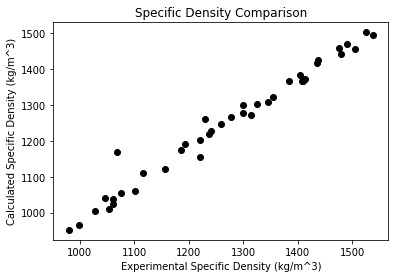

In [7]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

### Error is done in percent error, accepting experimental value as the true value.
data=pd.read_csv('analysis.csv',sep=',',header=None)
data.columns=['ID','ExpDens','CalDens','DensErr','ExpCpt','CalCpt','CptErr']
#print(data)

ExpDens=data.ExpDens.tolist()
CalDens=data.CalDens.tolist()

plt.title('Specific Density Comparison')
plt.xlabel('Experimental Specific Density (kg/m^3)')
plt.ylabel('Calculated Specific Density (kg/m^3)')
plt.plot(ExpDens,CalDens,'o',color='black')

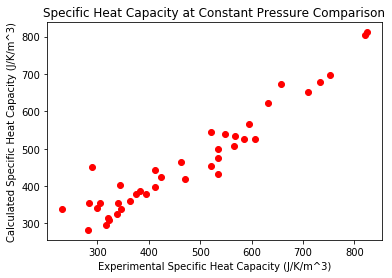

In [8]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

### Error is done in percent error, accepting experimental value as the true value.
data=pd.read_csv('analysis.csv',sep=',',header=None)
data.columns=['ID','ExpDens','CalDens','DensErr','ExpCpt','CalCpt','CptErr']
#print(data)

ExpCpt=data.ExpCpt.tolist()
CalCpt=data.CalCpt.tolist()

plt.title('Specific Heat Capacity at Constant Pressure Comparison')
plt.xlabel('Experimental Specific Heat Capacity (J/K/m^3)')
plt.ylabel('Calculated Specific Heat Capacity (J/K/m^3)')
plt.plot(ExpCpt,CalCpt,'o',color='red')